In [122]:
#load class
import numpy as np
import pandas as pd # in case it's not installed then install using conda create -c conda-forge -n name_of_my_env python pandas
# more installations information can be found: https://pandas.pydata.org/docs/getting_started/install.html
import matplotlib.pyplot as plt
import seaborn as sns
import os
#load sklearn module for creating and evaluating ML models. In case sklearn isn't installed,
#follow this link https://scikit-learn.org/stable/install.html for further details on the installation process.
from sklearn.neighbors import KNeighborsClassifier #load your classifier. In this code, I have used KNN. You can choose other algorithms. You have to use at least 3 to complete this.
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler #module for perform scaling
from sklearn.model_selection import train_test_split #module for splitting datatset
from sklearn import metrics #module for evaluating performance

In [123]:
#load your data
df = pd.read_csv("data_cleaned.csv") #change the name accordingly
df.head() # prints top 5 rows from the datatset to check data is load or not

,Temp,Humd,Label
0,23,33.0,1
1,23,33.0,1
2,23,33.0,1
3,23,33.0,1
4,23,33.0,1


In [124]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Temp     0
Humd     0
Label    0
dtype: int64


In [125]:
# remove duplicatesd
df = df.drop_duplicates()

In [126]:
# prepare features
x = df.drop(['Label'],axis=1) #remove class or label
y = df['Label'] #load label

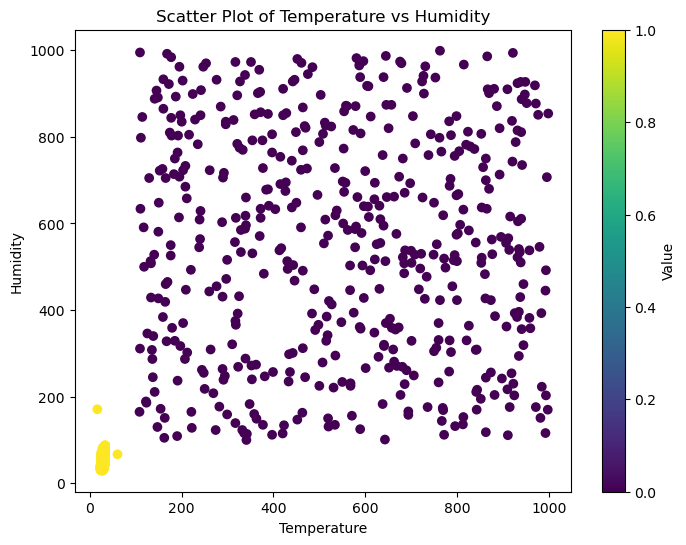

In [127]:


# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x['Temp'], x['Humd'], c=y, cmap='viridis', marker='o')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Scatter Plot of Temperature vs Humidity')
plt.colorbar(label='Value')
plt.show()

In [128]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2) #split datatset. Here ratio is 80:20. Change accordingly

In [129]:
# Scale the data using standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scale training set
x_test = scaler.transform(x_test) #scale test set

In [130]:
z = KNeighborsClassifier(n_neighbors=3) # KNN classifier for 3 neighbours
KNN = z.fit(x_train,y_train) # start training
predict = KNN.predict(x_test) # performance in the test set
print("Accuracy:", metrics.accuracy_score(y_test,predict)) # evaluating the performance based on accuracy

Accuracy: 1.0


In [131]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVM = clf.fit(x_train, y_train)
predict = SVM.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test,predict))

Accuracy: 1.0


In [132]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
RandomForest = clf.fit(x_train, y_train)
predict = RandomForest.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test,predict))

Accuracy: 1.0


In [91]:
# library for save and load scikit-learn models
import pickle
# file name, recommending *.pickle as a file extension
filename = "RandomForest.pickle"
# save model
pickle.dump(z, open(filename, "wb"))